<a href="https://colab.research.google.com/github/Maira-Nurul/Campaign-and-Transaction-Analysis-for-a-Leading-Payement-Gateway-in-Indonesia/blob/main/Project_Based_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Task 3: Data Cleaning Master Campaign**

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/College/Semester 7/Studpen/master_campaign.csv')
df.head()

,Campaign ID,Campaign Name,Campaign Code,Code Used,Code Quota,Campaign Start Date,Campaign End Date,Promo Duration
0,471,ANGPAO DOKU,DOKUANGPAO100,10,500,"February 7, 2019, 00:00","February 28, 2019, 23:59",21 days
1,96,SUKA ERAFONE,SUKADOKU,16,50,"May 30, 2016, 00:00","June 5, 2016, 23:59",6 days
2,509,Thank DOKU its Friday,TDIFASMARAKU1,0,100,"May 17, 2019, 00:00","May 19, 2019, 23:59",2 days
3,512,DOKU CEBAN,CEBANMUSIC5,38,250,"May 25, 2019, 00:00","June 10, 2019, 23:59",16 days
4,854,Saatnya Ragnarok,ROODOKUNIPIN,144,"1,000","June 21, 2023, 00:00","June 30, 2023, 23:59",9 days


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Campaign ID          819 non-null    int64 
 1   Campaign Name        819 non-null    object
 2   Campaign Code        818 non-null    object
 3   Code Used            819 non-null    object
 4   Code Quota           819 non-null    object
 5   Campaign Start Date  819 non-null    object
 6   Campaign End Date    819 non-null    object
 7   Promo Duration       819 non-null    object
dtypes: int64(1), object(7)
memory usage: 51.3+ KB


## **Change data type**

In [ ]:
df.rename(columns={'Campaign ID': 'Campaign_ID', 'Campaign Name': 'Campaign_Name', 'Campaign Code': 'Campaign_Code', 'Code Used': 'Code_Used', 'Code Quota': 'Code_Quota', 'Campaign Start Date': 'Campaign_Start_Date', 'Campaign End Date': 'Campaign_End_Date', 'Promo Duration':'Promo_Duration'}, inplace=True)
df.head()

,Campaign_ID,Campaign_Name,Campaign_Code,Code_Used,Code_Quota,Campaign_Start_Date,Campaign_End_Date,Promo_Duration
0,471,ANGPAO DOKU,DOKUANGPAO100,10,500,"February 7, 2019, 00:00","February 28, 2019, 23:59",21 days
1,96,SUKA ERAFONE,SUKADOKU,16,50,"May 30, 2016, 00:00","June 5, 2016, 23:59",6 days
2,509,Thank DOKU its Friday,TDIFASMARAKU1,0,100,"May 17, 2019, 00:00","May 19, 2019, 23:59",2 days
3,512,DOKU CEBAN,CEBANMUSIC5,38,250,"May 25, 2019, 00:00","June 10, 2019, 23:59",16 days
4,854,Saatnya Ragnarok,ROODOKUNIPIN,144,"1,000","June 21, 2023, 00:00","June 30, 2023, 23:59",9 days


In [ ]:
df['Code_Used'] = df['Code_Used'].str.replace(',', '', regex=False)
df['Code_Quota'] = df['Code_Quota'].str.replace(',', '', regex=False)
df.Code_Used = df.Code_Used.astype(int)
df.Code_Quota = df.Code_Quota.astype(int)
df.head()

,Campaign_ID,Campaign_Name,Campaign_Code,Code_Used,Code_Quota,Campaign_Start_Date,Campaign_End_Date,Promo_Duration
0,471,ANGPAO DOKU,DOKUANGPAO100,10,500,"February 7, 2019, 00:00","February 28, 2019, 23:59",21 days
1,96,SUKA ERAFONE,SUKADOKU,16,50,"May 30, 2016, 00:00","June 5, 2016, 23:59",6 days
2,509,Thank DOKU its Friday,TDIFASMARAKU1,0,100,"May 17, 2019, 00:00","May 19, 2019, 23:59",2 days
3,512,DOKU CEBAN,CEBANMUSIC5,38,250,"May 25, 2019, 00:00","June 10, 2019, 23:59",16 days
4,854,Saatnya Ragnarok,ROODOKUNIPIN,144,1000,"June 21, 2023, 00:00","June 30, 2023, 23:59",9 days


In [ ]:
df['Promo_Duration'] = df['Promo_Duration'].str.replace(r'\bday(s)?\b', '', regex=True).str.strip()
df.Promo_Duration = df.Promo_Duration.astype(int)
df.head()

,Campaign_ID,Campaign_Name,Campaign_Code,Code_Used,Code_Quota,Campaign_Start_Date,Campaign_End_Date,Promo_Duration
0,471,ANGPAO DOKU,DOKUANGPAO100,10,500,"February 7, 2019, 00:00","February 28, 2019, 23:59",21
1,96,SUKA ERAFONE,SUKADOKU,16,50,"May 30, 2016, 00:00","June 5, 2016, 23:59",6
2,509,Thank DOKU its Friday,TDIFASMARAKU1,0,100,"May 17, 2019, 00:00","May 19, 2019, 23:59",2
3,512,DOKU CEBAN,CEBANMUSIC5,38,250,"May 25, 2019, 00:00","June 10, 2019, 23:59",16
4,854,Saatnya Ragnarok,ROODOKUNIPIN,144,1000,"June 21, 2023, 00:00","June 30, 2023, 23:59",9


In [ ]:
df['Campaign_Start_Date'] = pd.to_datetime(df['Campaign_Start_Date'], format='%B %d, %Y, %H:%M', errors = 'coerce')
df['Campaign_End_Date'] = pd.to_datetime(df['Campaign_End_Date'], format='%B %d, %Y, %H:%M', errors = 'coerce')
df.head()

,Campaign_ID,Campaign_Name,Campaign_Code,Code_Used,Code_Quota,Campaign_Start_Date,Campaign_End_Date,Promo_Duration
0,471,ANGPAO DOKU,DOKUANGPAO100,10,500,2019-02-07,2019-02-28 23:59:00,21
1,96,SUKA ERAFONE,SUKADOKU,16,50,2016-05-30,2016-06-05 23:59:00,6
2,509,Thank DOKU its Friday,TDIFASMARAKU1,0,100,2019-05-17,2019-05-19 23:59:00,2
3,512,DOKU CEBAN,CEBANMUSIC5,38,250,2019-05-25,2019-06-10 23:59:00,16
4,854,Saatnya Ragnarok,ROODOKUNIPIN,144,1000,2023-06-21,2023-06-30 23:59:00,9


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 819 entries, 0 to 818
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Campaign_ID          819 non-null    int64         
 1   Campaign_Name        819 non-null    object        
 2   Campaign_Code        818 non-null    object        
 3   Code_Used            819 non-null    int64         
 4   Code_Quota           819 non-null    int64         
 5   Campaign_Start_Date  818 non-null    datetime64[ns]
 6   Campaign_End_Date    818 non-null    datetime64[ns]
 7   Promo_Duration       819 non-null    int64         
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 51.3+ KB


## **Drop NaT and null values**

In [ ]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 817 entries, 0 to 818
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Campaign_ID          817 non-null    int64         
 1   Campaign_Name        817 non-null    object        
 2   Campaign_Code        817 non-null    object        
 3   Code_Used            817 non-null    int64         
 4   Code_Quota           817 non-null    int64         
 5   Campaign_Start_Date  817 non-null    datetime64[ns]
 6   Campaign_End_Date    817 non-null    datetime64[ns]
 7   Promo_Duration       817 non-null    int64         
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 57.4+ KB


## **Drop duplicate & save as CSV**

In [ ]:
filtered_df = df[
    (df['Campaign_Start_Date'].dt.year >= 2021) &
    (df['Campaign_Start_Date'].dt.year <= 2024)
]

In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 238 entries, 4 to 811
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Campaign_ID          238 non-null    int64         
 1   Campaign_Name        238 non-null    object        
 2   Campaign_Code        238 non-null    object        
 3   Code_Used            238 non-null    int64         
 4   Code_Quota           238 non-null    int64         
 5   Campaign_Start_Date  238 non-null    datetime64[ns]
 6   Campaign_End_Date    238 non-null    datetime64[ns]
 7   Promo_Duration       238 non-null    int64         
dtypes: datetime64[ns](2), int64(4), object(2)
memory usage: 16.7+ KB


In [ ]:
df_cleaned = filtered_df.drop_duplicates()

#Print new shape
print("shape:",df.shape)
print("New Shape: ", df_cleaned.shape)

shape: (817, 8)
New Shape:  (238, 8)


In [ ]:
df_cleaned.describe()

,Campaign_ID,Code_Used,Code_Quota,Campaign_Start_Date,Campaign_End_Date,Promo_Duration
count,238.000000,238.000000,238.000000,238,238,238.000000
mean,807.550420,450.672269,689.096639,2022-10-29 21:34:47.394958080,2022-11-16 02:30:15.630251520,16.205882
min,675.000000,0.000000,10.000000,2021-01-25 00:00:00,2021-02-10 23:59:00,1.000000
25%,743.250000,0.000000,250.000000,2021-12-02 06:00:00,2021-12-18 11:59:00,14.250000
50%,805.500000,51.000000,625.000000,2022-09-26 00:00:00,2022-10-10 23:59:00,16.000000
75%,872.750000,747.750000,1000.000000,2023-09-13 12:00:00,2023-09-25 05:59:00,16.000000
max,939.000000,1500.000000,1500.000000,2024-09-25 00:00:00,2024-10-10 23:59:00,42.000000
std,76.004855,565.694690,518.895820,NaN,NaN,8.361786


In [ ]:
df_cleaned.to_csv('master_campaign_cleaned.csv', index=False)

# **Task 3: Data Cleaning Master TRX Campaign**

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/College/Semester 7/Studpen/master_trx_campaign.csv')
df1.head()

<ipython-input-16-e151adb5e4f5>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/drive/MyDrive/College/Semester 7/Studpen/master_trx_campaign.csv')


,campaign_id,merchant_name,merchant_category_name,transactions_datetime,cust_age,gender,city,job,paid_amount,customer_name,tpt
0,901,1356,Other,"February 25, 2024, 00:00",NaN,F,NaN,NaN,40000.0,5302326,1
1,903,848,Retail (Not Elsewhere Classified),"February 25, 2024, 00:01",NaN,M,NaN,NaN,40000.0,4717349,1
2,902,1308,Other,"February 25, 2024, 00:01",NaN,M,NaN,NaN,40000.0,4917609,1
3,903,848,Retail (Not Elsewhere Classified),"February 25, 2024, 00:01",NaN,M,NaN,NaN,40000.0,4717429,1
4,903,848,Retail (Not Elsewhere Classified),"February 25, 2024, 00:02",NaN,M,NaN,NaN,40000.0,4717437,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153788 entries, 0 to 153787
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   campaign_id             153788 non-null  int64  
 1   merchant_name           153788 non-null  int64  
 2   merchant_category_name  153788 non-null  object 
 3   transactions_datetime   153788 non-null  object 
 4   cust_age                72373 non-null   object 
 5   gender                  153262 non-null  object 
 6   city                    6264 non-null    object 
 7   job                     12631 non-null   object 
 8   paid_amount             153788 non-null  float64
 9   customer_name           153788 non-null  int64  
 10  tpt                     153788 non-null  int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 12.9+ MB


## **Null Values and change data type**

In [ ]:
df1 = df1.dropna(subset=['gender'])

In [ ]:
df1['transactions_datetime'] = pd.to_datetime(df1['transactions_datetime'], format='%B %d, %Y, %H:%M', errors = 'coerce')
df1.head()

,campaign_id,merchant_name,merchant_category_name,transactions_datetime,cust_age,gender,city,job,paid_amount,customer_name,tpt
0,901,1356,Other,2024-02-25 00:00:00,NaN,F,NaN,NaN,40000.0,5302326,1
1,903,848,Retail (Not Elsewhere Classified),2024-02-25 00:01:00,NaN,M,NaN,NaN,40000.0,4717349,1
2,902,1308,Other,2024-02-25 00:01:00,NaN,M,NaN,NaN,40000.0,4917609,1
3,903,848,Retail (Not Elsewhere Classified),2024-02-25 00:01:00,NaN,M,NaN,NaN,40000.0,4717429,1
4,903,848,Retail (Not Elsewhere Classified),2024-02-25 00:02:00,NaN,M,NaN,NaN,40000.0,4717437,1


In [ ]:
df1['cust_age'] = pd.to_numeric(df1['cust_age'], errors='coerce')
df1['cust_age'] = df1['cust_age'].astype('Int64')

## **Add customer status column**

In [ ]:
df1['customer_status'] = np.where(
    df1[['city', 'job', 'cust_age']].notna().all(axis=1),
    'premium',
    'non-premium')
df1.head()

,campaign_id,merchant_name,merchant_category_name,transactions_datetime,cust_age,gender,city,job,paid_amount,customer_name,tpt,customer_status
0,901,1356,Other,2024-02-25 00:00:00,<NA>,F,NaN,NaN,40000.0,5302326,1,non-premium
1,903,848,Retail (Not Elsewhere Classified),2024-02-25 00:01:00,<NA>,M,NaN,NaN,40000.0,4717349,1,non-premium
2,902,1308,Other,2024-02-25 00:01:00,<NA>,M,NaN,NaN,40000.0,4917609,1,non-premium
3,903,848,Retail (Not Elsewhere Classified),2024-02-25 00:01:00,<NA>,M,NaN,NaN,40000.0,4717429,1,non-premium
4,903,848,Retail (Not Elsewhere Classified),2024-02-25 00:02:00,<NA>,M,NaN,NaN,40000.0,4717437,1,non-premium


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 153262 entries, 0 to 153787
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   campaign_id             153262 non-null  int64         
 1   merchant_name           153262 non-null  int64         
 2   merchant_category_name  153262 non-null  object        
 3   transactions_datetime   153262 non-null  datetime64[ns]
 4   cust_age                71964 non-null   Int64         
 5   gender                  153262 non-null  object        
 6   city                    6178 non-null    object        
 7   job                     12429 non-null   object        
 8   paid_amount             153262 non-null  float64       
 9   customer_name           153262 non-null  int64         
 10  tpt                     153262 non-null  int64         
 11  customer_status         153262 non-null  object        
dtypes: Int64(1), datetime64[ns](1), flo

## **Check Inconsistencies**

<Axes: xlabel='merchant_category_name'>

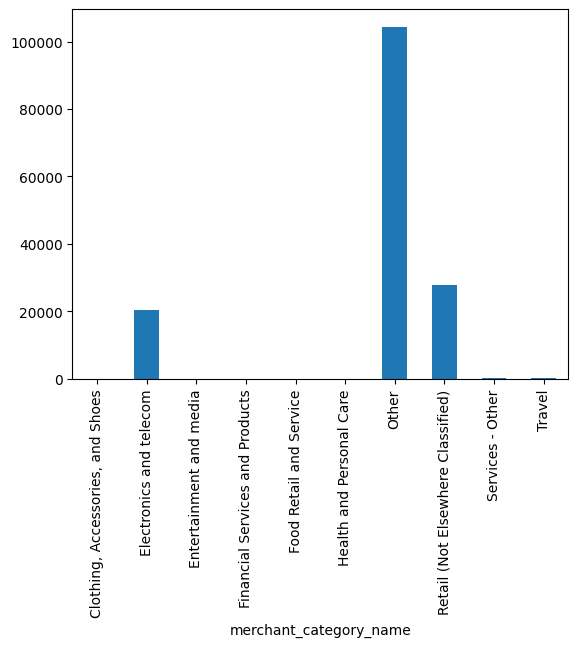

In [ ]:
df1.merchant_category_name.value_counts().sort_index().plot(kind='bar', title='')

<Axes: xlabel='gender'>

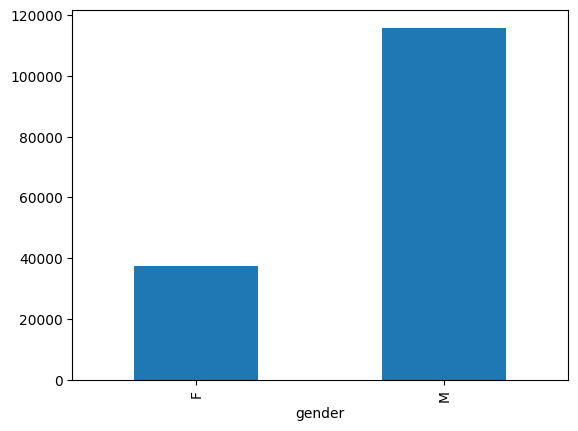

In [ ]:
df1.gender.value_counts().sort_index().plot(kind='bar', title='')

In [ ]:
df1.loc[df1['city'].str.contains(r'\baceh\b', case=False, na=False), 'city'] = 'Banda Aceh'
df1.loc[df1['city'].str.contains(r'\bbalikpapan\b', case=False, na=False), 'city'] = 'Balikpapan'
df1.loc[df1['city'].str.contains(r'\bbandar\b', case=False, na=False), 'city'] = 'Bandar Lampung'
df1.loc[df1['city'].str.contains(r'\bbandung\b', case=False, na=False), 'city'] = 'Bandung'
df1.loc[df1['city'].str.contains(r'\bbangka\b', case=False, na=False), 'city'] = 'Bangka'
df1.loc[df1['city'].str.contains(r'\bbangkalan\b', case=False, na=False), 'city'] = 'Bangkalan'
df1.loc[df1['city'].str.contains(r'\bbanjarnegara\b', case=False, na=False), 'city'] = 'Banjarnegara'
df1.loc[df1['city'].str.contains(r'\bbanjarbaru\b', case=False, na=False), 'city'] = 'Banjarbaru'
df1.loc[df1['city'].str.contains(r'\bbanjarmasin\b', case=False, na=False), 'city'] = 'Banjarmasin'
df1.loc[df1['city'].str.contains(r'\bbantul\b', case=False, na=False), 'city'] = 'Bantul'
df1.loc[df1['city'].str.contains(r'\bbanyuasin\b', case=False, na=False), 'city'] = 'Banyuasin'
df1.loc[df1['city'].str.contains(r'\bbanyu asin\b', case=False, na=False), 'city'] = 'Banyuasin'
df1.loc[df1['city'].str.contains(r'\bbanyumas\b', case=False, na=False), 'city'] = 'Banyumas'
df1.loc[df1['city'].str.contains(r'\bbanyuwangi\b', case=False, na=False), 'city'] = 'Banyuwangi'
df1.loc[df1['city'].str.contains(r'\bagam\b', case=False, na=False), 'city'] = 'Agam'
df1.loc[df1['city'].str.contains(r'\bbatam\b', case=False, na=False), 'city'] = 'Batam'
df1.loc[df1['city'].str.contains(r'\bbatang\b', case=False, na=False), 'city'] = 'Batang'
df1.loc[df1['city'].str.contains(r'\bbekasi\b', case=False, na=False), 'city'] = 'Bekasi'
df1.loc[df1['city'].str.contains(r'\bbinjau\b', case=False, na=False), 'city'] = 'Binjau'
df1.loc[df1['city'].str.contains(r'\bblitar\b', case=False, na=False), 'city'] = 'Blitar'
df1.loc[df1['city'].str.contains(r'\bblora\b', case=False, na=False), 'city'] = 'Blora'
df1.loc[df1['city'].str.contains(r'\bbogor\b', case=False, na=False), 'city'] = 'Bogor'
df1.loc[df1['city'].str.contains(r'\bbojonegoro\b', case=False, na=False), 'city'] = 'Bojonegoro'
df1.loc[df1['city'].str.contains(r'\bbojonegorp\b', case=False, na=False), 'city'] = 'Bojonegoro'
df1.loc[df1['city'].str.contains(r'\bbulukumba\b', case=False, na=False), 'city'] = 'Bulukumba'
df1.loc[df1['city'].str.contains(r'\bciamis\b', case=False, na=False), 'city'] = 'Ciamis'
df1.loc[df1['city'].str.contains(r'\bcianjur\b', case=False, na=False), 'city'] = 'Cianjur'
df1.loc[df1['city'].str.contains(r'\bcilacap\b', case=False, na=False), 'city'] = 'Cilacap'
df1.loc[df1['city'].str.contains(r'\bcilegon\b', case=False, na=False), 'city'] = 'Cilegon'
df1.loc[df1['city'].str.contains(r'\bcimahi\b', case=False, na=False), 'city'] = 'Cimahi'
df1.loc[df1['city'].str.contains(r'\bcirebon\b', case=False, na=False), 'city'] = 'Cirebon'
df1.loc[df1['city'].str.contains(r'\bdemak\b', case=False, na=False), 'city'] = 'Demak'
df1.loc[df1['city'].str.contains(r'\bdenpasar\b', case=False, na=False), 'city'] = 'Denpasar'
df1.loc[df1['city'].str.contains(r'\bdepok\b', case=False, na=False), 'city'] = 'Depok'
df1.loc[df1['city'].str.contains(r'\bjakarta\b', case=False, na=False), 'city'] = 'Jakarta'
df1.loc[df1['city'].str.contains(r'\bDKI\b', case=False, na=False), 'city'] = 'Jakarta'
df1.loc[df1['city'].str.contains(r'\bjaksel\b', case=False, na=False), 'city'] = 'Jakarta'
df1.loc[df1['city'].str.contains(r'\bdumai\b', case=False, na=False), 'city'] = 'Dumai'
df1.loc[df1['city'].str.contains(r'\bgarut\b', case=False, na=False), 'city'] = 'Garut'
df1.loc[df1['city'].str.contains(r'\bgresik\b', case=False, na=False), 'city'] = 'Gresik'
df1.loc[df1['city'].str.contains(r'\bgrobogan\b', case=False, na=False), 'city'] = 'Grobogan'
df1.loc[df1['city'].str.contains(r'\bgubug\b', case=False, na=False), 'city'] = 'Grobogan'
df1.loc[df1['city'].str.contains(r'\bindramayu\b', case=False, na=False), 'city'] = 'Indramayu'
df1.loc[df1['city'].str.contains(r'\bindramayu\b', case=False, na=False), 'city'] = 'Indramayu'
df1.loc[df1['city'].str.contains(r'\bjambi\b', case=False, na=False), 'city'] = 'Jambi'
df1.loc[df1['city'].str.contains(r'\bjayapura\b', case=False, na=False), 'city'] = 'Jayapura'
df1.loc[df1['city'].str.contains(r'\bjember\b', case=False, na=False), 'city'] = 'Jember'
df1.loc[df1['city'].str.contains(r'\bjepara\b', case=False, na=False), 'city'] = 'Jepara'
df1.loc[df1['city'].str.contains(r'\bjogjakarta\b', case=False, na=False), 'city'] = 'Yogyakarta'
df1.loc[df1['city'].str.contains(r'\byogjakarta\b', case=False, na=False), 'city'] = 'Yogyakarta'
df1.loc[df1['city'].str.contains(r'\bjombang\b', case=False, na=False), 'city'] = 'Jombang'
df1.loc[df1['city'].str.contains(r'\bbalangan\b', case=False, na=False), 'city'] = 'Balangan'
df1.loc[df1['city'].str.contains(r'\blebak\b', case=False, na=False), 'city'] = 'Lebak'
df1.loc[df1['city'].str.contains(r'\bbadung\b', case=False, na=False), 'city'] = 'Badung'
df1.loc[df1['city'].str.contains(r'\bbarru\b', case=False, na=False), 'city'] = 'Barru'
df1.loc[df1['city'].str.contains(r'\bbima\b', case=False, na=False), 'city'] = 'Bima'
df1.loc[df1['city'].str.contains(r'\bbondowoso\b', case=False, na=False), 'city'] = 'Bondowoso'
df1.loc[df1['city'].str.contains(r'\bburu\b', case=False, na=False), 'city'] = 'Buru Selatan'
df1.loc[df1['city'].str.contains(r'\bdeli\b', case=False, na=False), 'city'] = 'Deli Serdang'
df1.loc[df1['city'].str.contains(r'\bhulu sungai\b', case=False, na=False), 'city'] = 'Hulu Sungai'
df1.loc[df1['city'].str.contains(r'\bindragiri\b', case=False, na=False), 'city'] = 'Indragiri'
df1.loc[df1['city'].str.contains(r'\bkampar\b', case=False, na=False), 'city'] = 'Kampar'
df1.loc[df1['city'].str.contains(r'\bkarawang\b', case=False, na=False), 'city'] = 'Karawang'
df1.loc[df1['city'].str.contains(r'\bkarimun\b', case=False, na=False), 'city'] = 'Karimun'
df1.loc[df1['city'].str.contains(r'\bkediri\b', case=False, na=False), 'city'] = 'Kediri'
df1.loc[df1['city'].str.contains(r'\bkendal\b', case=False, na=False), 'city'] = 'Kendal'
df1.loc[df1['city'].str.contains(r'\bklaten\b', case=False, na=False), 'city'] = 'Klaten'
df1.loc[df1['city'].str.contains(r'\bkonawe\b', case=False, na=False), 'city'] = 'Konawe Selatan'
df1.loc[df1['city'].str.contains(r'\bkotawaringin\b', case=False, na=False), 'city'] = 'Kotawaringin'
df1.loc[df1['city'].str.contains(r'\bkonawe\b', case=False, na=False), 'city'] = 'Konawe Selatan'
df1.loc[df1['city'].str.contains(r'\bkuantan\b', case=False, na=False), 'city'] = 'Kuantan Singingi'
df1.loc[df1['city'].str.contains(r'\bkubu\b', case=False, na=False), 'city'] = 'Kubu Raya'
df1.loc[df1['city'].str.contains(r'\bkutai timur\b', case=False, na=False), 'city'] = 'Kutai Timur'
df1.loc[df1['city'].str.contains(r'\blahar\b', case=False, na=False), 'city'] = 'Lahat'
df1.loc[df1['city'].str.contains(r'\blamongan\b', case=False, na=False), 'city'] = 'Lamongan'
df1.loc[df1['city'].str.contains(r'\blampung\b', case=False, na=False), 'city'] = 'Lampung'
df1.loc[df1['city'].str.contains(r'\blombok\b', case=False, na=False), 'city'] = 'Lombok'
df1.loc[df1['city'].str.contains(r'\bmagelang\b', case=False, na=False), 'city'] = 'Magelang'
df1.loc[df1['city'].str.contains(r'\bmagetan\b', case=False, na=False), 'city'] = 'Magetan'
df1.loc[df1['city'].str.contains(r'\bmajene\b', case=False, na=False), 'city'] = 'Majene'
df1.loc[df1['city'].str.contains(r'\bmalang\b', case=False, na=False), 'city'] = 'Malang'
df1.loc[df1['city'].str.contains(r'\bminahasa\b', case=False, na=False), 'city'] = 'Minahasa'
df1.loc[df1['city'].str.contains(r'\bmorowali\b', case=False, na=False), 'city'] = 'Morowali'
df1.loc[df1['city'].str.contains(r'\bmoro\b', case=False, na=False), 'city'] = 'Moro'
df1.loc[df1['city'].str.contains(r'\bnganjuk\b', case=False, na=False), 'city'] = 'Nganjuk'
df1.loc[df1['city'].str.contains(r'\bpandeglang\b', case=False, na=False), 'city'] = 'Pandeglang'
df1.loc[df1['city'].str.contains(r'\bpangandaran\b', case=False, na=False), 'city'] = 'Pangandaran'
df1.loc[df1['city'].str.contains(r'\bpasuruan\b', case=False, na=False), 'city'] = 'Pasuruan'
df1.loc[df1['city'].str.contains(r'\bpidie\b', case=False, na=False), 'city'] = 'Pidie Jaya'
df1.loc[df1['city'].str.contains(r'\bpinrang\b', case=False, na=False), 'city'] = 'Pinrang'
df1.loc[df1['city'].str.contains(r'\bpolewali\b', case=False, na=False), 'city'] = 'Polewali Mandar'
df1.loc[df1['city'].str.contains(r'\bposo\b', case=False, na=False), 'city'] = 'Poso'
df1.loc[df1['city'].str.contains(r'\bpringsewu\b', case=False, na=False), 'city'] = 'Pringsewu'
df1.loc[df1['city'].str.contains(r'\bpurbalingga\b', case=False, na=False), 'city'] = 'Purbalingga'
df1.loc[df1['city'].str.contains(r'\bprobolinggo\b', case=False, na=False), 'city'] = 'Probolinggo'
df1.loc[df1['city'].str.contains(r'\bpurwakarta\b', case=False, na=False), 'city'] = 'Purwakarta'
df1.loc[df1['city'].str.contains(r'\bpurworejo\b', case=False, na=False), 'city'] = 'Purworejo'
df1.loc[df1['city'].str.contains(r'\brembang\b', case=False, na=False), 'city'] = 'Rembang'
df1.loc[df1['city'].str.contains(r'\bsemarang\b', case=False, na=False), 'city'] = 'Semarang'
df1.loc[df1['city'].str.contains(r'\bserang\b', case=False, na=False), 'city'] = 'Serang'
df1.loc[df1['city'].str.contains(r'\bsidereng\b', case=False, na=False), 'city'] = 'Sidereng Rappang'
df1.loc[df1['city'].str.contains(r'\bsidoarjo\b', case=False, na=False), 'city'] = 'Sidoarjo'
df1.loc[df1['city'].str.contains(r'\bsitubondo\b', case=False, na=False), 'city'] = 'Situbondo'
df1.loc[df1['city'].str.contains(r'\bsleman\b', case=False, na=False), 'city'] = 'Sleman'
df1.loc[df1['city'].str.contains(r'\bsubang\b', case=False, na=False), 'city'] = 'Subang'
df1.loc[df1['city'].str.contains(r'\bsukoharjo\b', case=False, na=False), 'city'] = 'Sukoharjo'
df1.loc[df1['city'].str.contains(r'\bsukoharjo\b', case=False, na=False), 'city'] = 'Sukoharjo'
df1.loc[df1['city'].str.contains(r'\bsumbawa\b', case=False, na=False), 'city'] = 'Sumbawa Barat'
df1.loc[df1['city'].str.contains(r'\bsumedang\b', case=False, na=False), 'city'] = 'Sumedang'
df1.loc[df1['city'].str.contains(r'\btabalong\b', case=False, na=False), 'city'] = 'Tabalong'
df1.loc[df1['city'].str.contains(r'\btabanan\b', case=False, na=False), 'city'] = 'Tabanan'
df1.loc[df1['city'].str.contains(r'\btangerang\b', case=False, na=False), 'city'] = 'Tangerang'
df1.loc[df1['city'].str.contains(r'\bjabung\b', case=False, na=False), 'city'] = 'Tanjung Jabung Barat'
df1.loc[df1['city'].str.contains(r'\btapin\b', case=False, na=False), 'city'] = 'Tapin'
df1.loc[df1['city'].str.contains(r'\btasikmalaya\b', case=False, na=False), 'city'] = 'Tasikmalaya'
df1.loc[df1['city'].str.contains(r'\betegal\b', case=False, na=False), 'city'] = 'Tegal'
df1.loc[df1['city'].str.contains(r'\btuban\b', case=False, na=False), 'city'] = 'Tuban'
df1.loc[df1['city'].str.contains(r'\btulungagung\b', case=False, na=False), 'city'] = 'Tulungagung'
df1.loc[df1['city'].str.contains(r'\bwonogiri\b', case=False, na=False), 'city'] = 'Wonogiri'
df1.loc[df1['city'].str.contains(r'\bbali\b', case=False, na=False), 'city'] = 'Bali'
df1.loc[df1['city'].str.contains(r'\bNTB\b', case=False, na=False), 'city'] = 'NTB'
df1.loc[df1['city'].str.contains(r'\bbanten\b', case=False, na=False), 'city'] = 'Banten'
df1.loc[df1['city'].str.contains(r'\bkalbar\b', case=False, na=False), 'city'] = 'Kalimantan Barat'
df1.loc[df1['city'].str.contains(r'\bbanten\b', case=False, na=False), 'city'] = 'Banten'
df1.loc[df1['city'].str.contains(r'\bbantaeng\b', case=False, na=False), 'city'] = 'Bantaeng'
df1.loc[df1['city'].str.contains(r'\bdairi\b', case=False, na=False), 'city'] = 'Dairi'
df1.loc[df1['city'].str.contains(r'\bkebumen\b', case=False, na=False), 'city'] = 'Kebumen'
df1.loc[df1['city'].str.contains(r'\bmadiun\b', case=False, na=False), 'city'] = 'Madiun'
df1.loc[df1['city'].str.contains(r'\benim\b', case=False, na=False), 'city'] = 'Muara Enim'
df1.loc[df1['city'].str.contains(r'\bngawi\b', case=False, na=False), 'city'] = 'Ngawi'
df1.loc[df1['city'].str.contains(r'\bpati\b', case=False, na=False), 'city'] = 'Pati'
df1.loc[df1['city'].str.contains(r'\bpontianak\b', case=False, na=False), 'city'] = 'Pontianak'
df1.loc[df1['city'].str.contains(r'\bsragen\b', case=False, na=False), 'city'] = 'Sragen'
df1.loc[df1['city'].str.contains(r'\bsukabumi\b', case=False, na=False), 'city'] = 'Sukabumi'
df1.loc[df1['city'].str.contains(r'\btanggamus\b', case=False, na=False), 'city'] = 'Tanggamus'
df1.loc[df1['city'].str.contains(r'\btulang\b', case=False, na=False), 'city'] = 'Tulang Bawang Barat'
df1.loc[df1['city'].str.contains(r'\bkota bitung\b', case=False, na=False), 'city'] = 'Bitung'
df1['city'] = df1['city'].str.replace('\bKota\b','', case=False).str.strip()
df1.loc[df1['city'].str.contains(r'\bsurakarta\b', case=False, na=False), 'city'] = 'Surakarta'
df1.loc[df1['city'].str.contains(r'\bkutai kartanegara\b', case=False, na=False), 'city'] = 'Kutai Kartanegara'
df1.loc[df1['city'].str.contains(r'\bmedan\b', case=False, na=False), 'city'] = 'Medan'
df1.loc[df1['city'].str.contains(r'\bmojokerto\b', case=False, na=False), 'city'] = 'Mojokerto'
df1.loc[df1['city'].str.contains(r'\btemanggung\b', case=False, na=False), 'city'] = 'Temanggung'
df1.loc[df1['city'].str.contains(r'\bpandan\b', case=False, na=False), 'city'] = 'Tanjung Pandan'
df1.loc[df1['city'].str.contains(r'\bpinang\b', case=False, na=False), 'city'] = 'Tanjung Pinang'
df1.loc[df1['city'].str.contains(r'\bsurabaya\b', case=False, na=False), 'city'] = 'Surabaya'
df1.loc[df1['city'].str.contains('siantar', case=False, na=False), 'city'] = 'Pematang Siantar'
df1['city'] = df1['city'].str.title()
df1 = df1[df1['city'] != 'Ashdkajshd']

## **Drop duplicates and save as CSV**

In [ ]:
df_cleaned1 = df1.drop_duplicates()

#Print new shape
print("shape:",df1.shape)
print("New Shape: ", df_cleaned1.shape)

shape: (153261, 12)
New Shape:  (153261, 12)


In [ ]:
df2=pd.read_csv('/content/drive/MyDrive/College/Semester 7/Studpen/master_trx_campaign_cleaned.csv')
df2['transactions_datetime'] = pd.to_datetime(df2['transactions_datetime'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153261 entries, 0 to 153260
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   campaign_id             153261 non-null  int64         
 1   merchant_name           153261 non-null  int64         
 2   merchant_category_name  153261 non-null  object        
 3   transactions_datetime   153261 non-null  datetime64[ns]
 4   cust_age                71963 non-null   float64       
 5   gender                  153261 non-null  object        
 6   city                    6177 non-null    object        
 7   job                     12428 non-null   object        
 8   paid_amount             153261 non-null  float64       
 9   customer_name           153261 non-null  int64         
 10  tpt                     153261 non-null  int64         
 11  customer_status         153261 non-null  object        
dtypes: datetime64[ns](1), float64(

In [ ]:
filtered_df1 = df2[
    (df2['transactions_datetime'].dt.year >= 2021) &
    (df2['transactions_datetime'].dt.year <= 2024)
]
filtered_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108379 entries, 0 to 152217
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   campaign_id             108379 non-null  int64         
 1   merchant_name           108379 non-null  int64         
 2   merchant_category_name  108379 non-null  object        
 3   transactions_datetime   108379 non-null  datetime64[ns]
 4   cust_age                27097 non-null   float64       
 5   gender                  108379 non-null  object        
 6   city                    1561 non-null    object        
 7   job                     2980 non-null    object        
 8   paid_amount             108379 non-null  float64       
 9   customer_name           108379 non-null  int64         
 10  tpt                     108379 non-null  int64         
 11  customer_status         108379 non-null  object        
dtypes: datetime64[ns](1), float64(2), i

In [ ]:
filtered_df1.to_csv('master_trx_campaign_cleaned.csv', index=False)